# Question 2

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch
import random
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("distilbert/distilgpt2")
model = AutoModelForCausalLM.from_pretrained("distilbert/distilgpt2")

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [ ]:
# tokenize paragraph
def compute_paragraph_perplexity(paragraph):
    tokenized_paragraph = tokenizer(paragraph, return_tensors="pt")

    # compute the log likelihood
    labels = tokenized_paragraph.input_ids.clone()
    outputs = model(**tokenized_paragraph, labels=labels)
    loss = outputs.loss

    # compute the perplexity
    perplexity = torch.exp(loss)
    print(perplexity)

In [ ]:
# original sample
sample_paragraph = "Choose a short English paragraph (e.g., 3 to 5 sentences). Tokenize it and compute its perplexity using the model’s log-likelihood output. Then compute the perplexity of a randomly shuffled version of the same paragraph. Comment on the difference."
compute_paragraph_perplexity(sample_paragraph)

# shuffle words in paragraph
shuffled_words = sample_paragraph.split()
random.shuffle(shuffled_words)
shuffled_paragraph = " ".join(shuffled_words)

compute_paragraph_perplexity(shuffled_paragraph)


tensor(47.4213, grad_fn=<ExpBackward0>)
tensor(944.7787, grad_fn=<ExpBackward0>)


In [ ]:
# generate continuations of "Once upon a time" for different temperatures
prompt = "Once upon a time"
inputs = tokenizer(prompt, return_tensors="pt")
attention_mask = inputs["attention_mask"]

# greedy decoding first
generated_text = model.generate(
    inputs["input_ids"],
    attention_mask=attention_mask,
    max_length=500,
    do_sample=False,
)

print(f"Continuation for greedy decoding:")
print(tokenizer.decode(generated_text[0], skip_special_tokens=True))

for temperature in [0.3, 0.6, 0.9, 1.2, 1.5]:
    generated_text = model.generate(
        inputs["input_ids"],
        attention_mask=attention_mask,
        max_length=500,
        do_sample=True,
        temperature=temperature,
    )
    print(f"Continuation for temperature {temperature}:")
    print(tokenizer.decode(generated_text[0], skip_special_tokens=True))

# Question 3

In [ ]:
# initialize loss fn
def f(x, y):
    return x**2 + y**2

def obtain_trajectory(momentum):
    # initialize parameters
    x = torch.tensor([32.0], requires_grad=True)
    y = torch.tensor([24.0], requires_grad=True)

    # initialize optimizer
    optimizer = torch.optim.SGD([x, y], lr = 0.1, momentum=momentum)

    trajectory = [[x.item(), y.item()]]

    for step in range(50):
        loss = f(x, y)
        loss.backward()
        optimizer.step()

        if step % 5 == 0:
            print(f"Step {step:02d}: x={x.item():.4f}, y={y.item():.4f}, f={loss.item():.4f}")

        optimizer.zero_grad()
        trajectory.append([x.item(), y.item()])

    trajectory = np.array(trajectory)
    return trajectory

Step 00: x=25.6000, y=19.2000, f=1600.0000
Step 05: x=8.3886, y=6.2915, f=171.7987
Step 10: x=2.7488, y=2.0616, f=18.4467
Step 15: x=0.9007, y=0.6755, f=1.9807
Step 20: x=0.2951, y=0.2214, f=0.2127
Step 25: x=0.0967, y=0.0725, f=0.0228
Step 30: x=0.0317, y=0.0238, f=0.0025
Step 35: x=0.0104, y=0.0078, f=0.0003
Step 40: x=0.0034, y=0.0026, f=0.0000
Step 45: x=0.0011, y=0.0008, f=0.0000


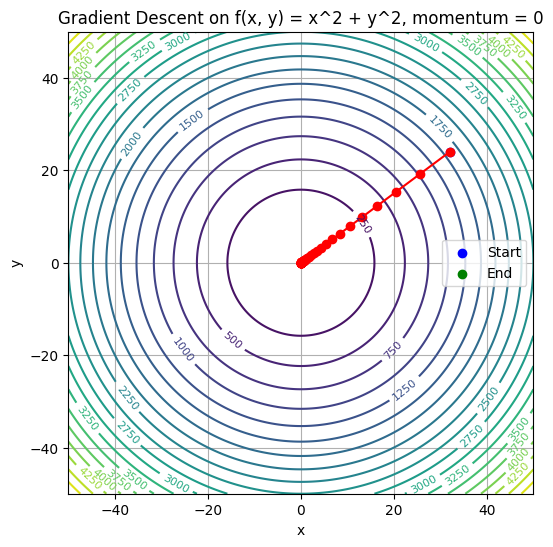

Step 00: x=25.6000, y=19.2000, f=1600.0000
Step 05: x=3.4790, y=2.6092, f=46.6653
Step 10: x=0.3170, y=0.2378, f=0.4192
Step 15: x=0.0261, y=0.0196, f=0.0029
Step 20: x=0.0021, y=0.0016, f=0.0000
Step 25: x=0.0002, y=0.0001, f=0.0000
Step 30: x=0.0000, y=0.0000, f=0.0000
Step 35: x=0.0000, y=0.0000, f=0.0000
Step 40: x=0.0000, y=0.0000, f=0.0000
Step 45: x=0.0000, y=0.0000, f=0.0000


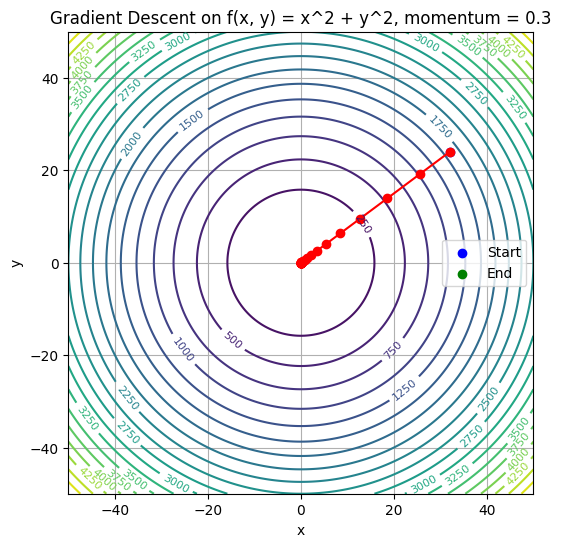

Step 00: x=25.6000, y=19.2000, f=1600.0000
Step 05: x=-5.1343, y=-3.8508, f=15.8468
Step 10: x=-0.2770, y=-0.2078, f=3.1747
Step 15: x=0.4917, y=0.3688, f=0.8176
Step 20: x=-0.1426, y=-0.1069, f=0.0266
Step 25: x=0.0093, y=0.0070, f=0.0003
Step 30: x=0.0080, y=0.0060, f=0.0003
Step 35: x=-0.0034, y=-0.0025, f=0.0000
Step 40: x=0.0005, y=0.0004, f=0.0000
Step 45: x=0.0001, y=0.0001, f=0.0000


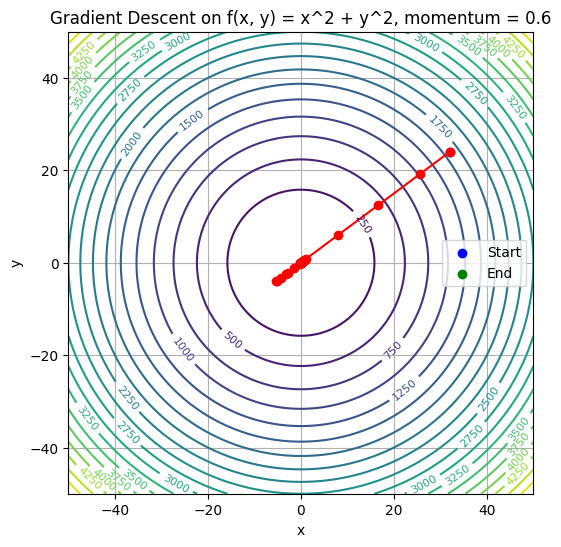

Step 00: x=25.6000, y=19.2000, f=1600.0000
Step 05: x=-22.6872, y=-17.0154, f=539.0198
Step 10: x=8.1362, y=6.1022, f=0.0310
Step 15: x=5.0575, y=3.7931, f=183.0313
Step 20: x=-9.9879, y=-7.4909, f=195.1638
Step 25: x=7.2505, y=5.4379, f=40.0650
Step 30: x=-1.5335, y=-1.1501, f=3.1036
Step 35: x=-2.7096, y=-2.0322, f=30.7276
Step 40: x=3.6827, y=2.7620, f=21.5405
Step 45: x=-2.1745, y=-1.6309, f=2.2012


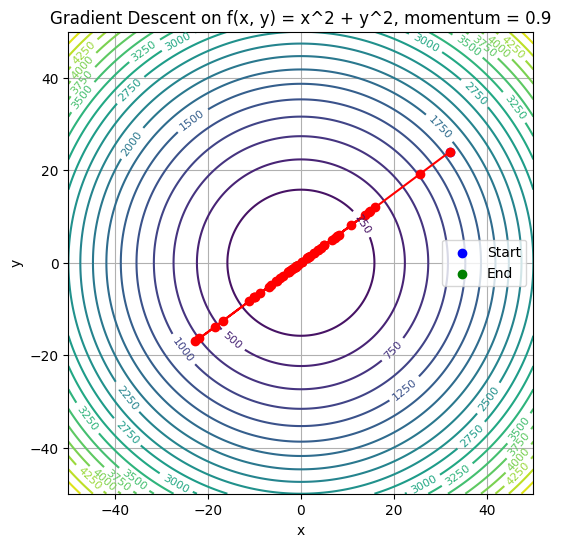

In [ ]:
X = np.linspace(-50, 50, 200)
Y = np.linspace(-50, 50, 200)
X, Y = np.meshgrid(X, Y)
Z = f(X, Y)

for momentum in [0, 0.3, 0.6, 0.9]:
    trajectory = obtain_trajectory(momentum)

    plt.figure(figsize=(6, 6))
    contours = plt.contour(X, Y, Z, levels=20, cmap="viridis")
    plt.clabel(contours, inline=True, fontsize=8)

    plt.plot(trajectory[:, 0], trajectory[:, 1], marker="o", color="red")
    plt.scatter([trajectory[0, 0]], [trajectory[0, 1]], color="blue", label="Start")
    plt.scatter([trajectory[-1, 0]], [trajectory[-1, 1]], color="green", label="End")

    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"Gradient Descent on f(x, y) = x^2 + y^2, momentum = {momentum}")
    plt.legend()
    plt.grid(True)
    plt.show()

# Question *4*

In [1]:
!pip install evaluate

In [18]:
import numpy as np, evaluate, torch

from transformers import TrainingArguments, Trainer
from datasets import load_dataset

from transformers import AutoTokenizer, AutoModelForSequenceClassification, DataCollatorWithPadding
import matplotlib.pyplot as plt

from torch.utils.data import DataLoader


In [19]:
# 1) load model, freeze layers
tokenizer = AutoTokenizer.from_pretrained("answerdotai/ModernBERT-base")
model = AutoModelForSequenceClassification.from_pretrained("answerdotai/ModernBERT-base")

model.eval()
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

# freeze base model parameters
for param in model.base_model.parameters():
    param.requires_grad = False

# track head parameters
params_to_train = []
for name, param in model.named_parameters():
    if param.requires_grad and "classifier.weight" in name:
        print(name)
        params_to_train.append(param)

Some weights of ModernBertForSequenceClassification were not initialized from the model checkpoint at answerdotai/ModernBERT-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


classifier.weight


In [20]:
trainable_params = [p for p in params_to_train]
total = sum(p.numel() for p in trainable_params)
print(f"Trainable parameters: {total:,}")

Trainable parameters: 1,536


In [37]:
for n, m in model.named_modules():
    print(n)
    if "encoder.layer." in n and any(x in n for x in ["attention.self.query", "attention.self.key", "attention.self.value", "attention.output.dense"]):
        print(n)


base_model
base_model.model
base_model.model.model
base_model.model.model.embeddings
base_model.model.model.embeddings.tok_embeddings
base_model.model.model.embeddings.norm
base_model.model.model.embeddings.drop
base_model.model.model.layers
base_model.model.model.layers.0
base_model.model.model.layers.0.attn_norm
base_model.model.model.layers.0.attn
base_model.model.model.layers.0.attn.Wqkv
base_model.model.model.layers.0.attn.rotary_emb
base_model.model.model.layers.0.attn.Wo
base_model.model.model.layers.0.attn.out_drop
base_model.model.model.layers.0.mlp_norm
base_model.model.model.layers.0.mlp
base_model.model.model.layers.0.mlp.Wi
base_model.model.model.layers.0.mlp.act
base_model.model.model.layers.0.mlp.drop
base_model.model.model.layers.0.mlp.Wo
base_model.model.model.layers.1
base_model.model.model.layers.1.attn_norm
base_model.model.model.layers.1.attn
base_model.model.model.layers.1.attn.Wqkv
base_model.model.model.layers.1.attn.rotary_emb
base_model.model.model.layers.1.a

In [21]:
# 2) load strategyqa
ds = load_dataset("wics/strategy-qa", revision="refs/convert/parquet")

def preprocess(ex):
    ex["label"] = int(ex["answer"])
    ex["prompt"] = f"Question: {ex['question']} Answer: {tokenizer.mask_token}"
    return ex

ds = ds.map(preprocess)

test_splits = ds["test"].train_test_split(test_size=0.2)
ds_test = test_splits["test"]
ds_train = test_splits["train"]

val_splits = ds_train.train_test_split(test_size=0.1)
ds_val = val_splits["test"]
ds_train = val_splits["train"]

Map:   0%|          | 0/2290 [00:00<?, ? examples/s]

In [22]:
# 3) load accuracy metric to compute metrics
accuracy = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=-1)
    return {"accuracy": accuracy.compute(predictions=preds, references=labels)["accuracy"]}

In [23]:
yes_id = tokenizer.convert_tokens_to_ids("yes")
no_id  = tokenizer.convert_tokens_to_ids("no")

In [24]:
data_collator = DataCollatorWithPadding(tokenizer=tokenizer, pad_to_multiple_of=None)

In [25]:
# 4) tokenize strategyqa
def tok(batch):
    encoded = tokenizer(
        batch["prompt"],
        padding=False, # pad dynamically later
        max_length=512,
        truncation=True,
    )
    encoded["labels"] = batch["label"]
    return encoded

ds_train_tok = ds_train.map(tok, batched=True, batch_size=16)
ds_train_tok = ds_train_tok.remove_columns(["question", "answer", "prompt", "qid", "term", "description", "facts", "decomposition", "label"])
ds_train_tok.set_format("torch")

ds_val_tok = ds_val.map(tok, batched=True, batch_size=16)
ds_val_tok = ds_val_tok.remove_columns(["question", "answer", "prompt", "qid", "term", "description", "facts", "decomposition", "label"])
ds_val_tok.set_format("torch")

ds_test_tok = ds_test.map(tok, batched=True, batch_size=16)
ds_test_tok = ds_test_tok.remove_columns(["question", "answer", "prompt", "qid", "term", "description", "facts", "decomposition", "label"])
ds_test_tok.set_format("torch")

Map:   0%|          | 0/1648 [00:00<?, ? examples/s]

Map:   0%|          | 0/184 [00:00<?, ? examples/s]

Map:   0%|          | 0/458 [00:00<?, ? examples/s]

In [26]:
from transformers import TrainerCallback
class PrintTrainValCallback(TrainerCallback):
    def __init__(self, trainer_ref):
        self.trainer = trainer_ref

    def on_epoch_end(self, args, state, control, **kwargs):
        train_metrics = self.trainer.evaluate(
            eval_dataset=self.trainer.train_dataset, metric_key_prefix="train"
        )
        val_metrics = self.trainer.evaluate(
            eval_dataset=self.trainer.eval_dataset, metric_key_prefix="eval"
        )
        epoch = int(state.epoch) if state.epoch is not None else 0
        print(f"[Epoch {epoch}] train acc: {train_metrics['train_accuracy']:.4f}, "
              f"val acc: {val_metrics['eval_accuracy']:.4f}")

In [27]:
# 5) train
args = TrainingArguments(
    output_dir="modernbert-head-only",
    learning_rate=1e-3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    num_train_epochs=8,
    eval_strategy="epoch",
    save_strategy="epoch",
    logging_steps=50,
    load_best_model_at_end=True,
    fp16=torch.cuda.is_available(),
    weight_decay=0.0,
    metric_for_best_model="accuracy",
    report_to="none",
)

trainer = Trainer(
    model=model,
    args=args,
    train_dataset=ds_train_tok,
    eval_dataset=ds_val_tok,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

/tmp/ipython-input-1182552515.py:18: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [28]:
trainer.add_callback(PrintTrainValCallback(trainer))

trainer.train()

The tokenizer has new PAD/BOS/EOS tokens that differ from the model config and generation config. The model config and generation config were aligned accordingly, being updated with the tokenizer's values. Updated tokens: {'eos_token_id': None, 'bos_token_id': None}.


Epoch,Training Loss,Validation Loss,Accuracy
1,0.794900,0.754905,0.532609
2,0.658600,0.694469,0.532609
3,0.648800,0.684483,0.586957
4,0.615700,0.750722,0.625000
5,0.634400,0.702053,0.586957
6,0.556500,0.727070,0.559783
7,0.544200,0.733855,0.565217
8,0.495500,0.736031,0.570652


[Epoch 1] train acc: 0.5643, val acc: 0.5326
[Epoch 2] train acc: 0.6699, val acc: 0.5326
[Epoch 3] train acc: 0.7063, val acc: 0.5870
[Epoch 4] train acc: 0.6535, val acc: 0.6250
[Epoch 5] train acc: 0.7318, val acc: 0.5870
[Epoch 6] train acc: 0.7360, val acc: 0.5598
[Epoch 7] train acc: 0.7391, val acc: 0.5652
[Epoch 8] train acc: 0.7409, val acc: 0.5707


TrainOutput(global_step=824, training_loss=0.6158845841305928, metrics={'train_runtime': 248.8921, 'train_samples_per_second': 52.971, 'train_steps_per_second': 3.311, 'total_flos': 227285483292672.0, 'train_loss': 0.6158845841305928, 'epoch': 8.0})

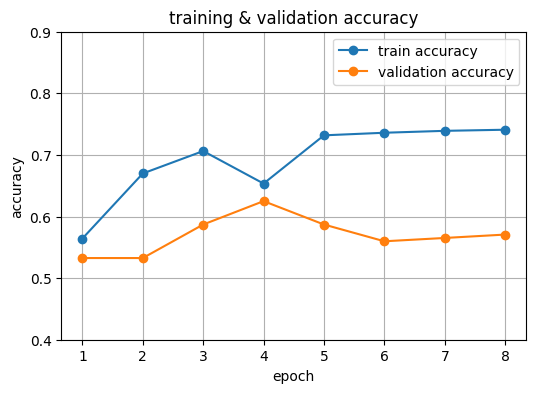

In [31]:
# plot
train_accs = [0.5643, 0.6699, 0.7063, 0.6535, 0.7318, 0.7360, 0.7391, 0.7409]
dev_accs = [0.5326, 0.5326, 0.5870, 0.6250, 0.5870, 0.5598, 0.5652, 0.5707]

plt.figure(figsize=(6,4))
plt.plot(range(1, 9), train_accs, marker="o", label="train accuracy")
plt.plot(range(1, 9), dev_accs, marker="o", label="validation accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("training & validation accuracy")
plt.legend()
plt.grid(True)
plt.ylim(0.4, 0.9)
plt.show()

In [52]:
data_collator = DataCollatorWithPadding(
    tokenizer=tokenizer,
    pad_to_multiple_of=8 if torch.cuda.is_available() else None,
)

test_loader = DataLoader(ds_test_tok, batch_size=16, shuffle=False, collate_fn=data_collator)

def eval(model, dataloader, name="split"):
    correct = 0
    total = 0
    all_preds, all_labels = [], []
    with torch.no_grad():
        for batch in dataloader:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels = batch["labels"].to(device)

            outputs = model(input_ids, attention_mask=attention_mask)
            preds = torch.argmax(outputs.logits, dim=-1)

            correct += (preds == labels).sum().item()
            total += labels.size(0)

            all_preds.extend(preds.cpu().tolist())
            all_labels.extend(labels.cpu().tolist())

    accuracy = correct / total
    print(f"{name} Accuracy: {accuracy:.4f}")
    return all_preds, all_labels

In [ ]:
test_preds, test_labels = eval(model, test_loader, name="test")

## LoRA

In [32]:
import torch, re
from peft import LoraConfig, get_peft_model, TaskType

In [46]:
# 1) load model and config
MODEL = "answerdotai/ModernBERT-base"
tokenizer = AutoTokenizer.from_pretrained(MODEL, use_fast=True)
model = AutoModelForSequenceClassification.from_pretrained(MODEL, num_labels=2)

# specify to only target head
lora_cfg = LoraConfig(
    r=1,
    lora_alpha=16,
    lora_dropout=0.1,
    bias="none",
    task_type=TaskType.SEQ_CLS,
    target_modules=["head.dense"]
)

model = get_peft_model(model, lora_cfg)
model.print_trainable_parameters()

Some weights of ModernBertForSequenceClassification were not initialized from the model checkpoint at answerdotai/ModernBERT-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


trainable params: 3,074 || all params: 149,609,476 || trainable%: 0.0021


In [47]:
# 2) train
args = TrainingArguments(
    output_dir="modernbert-head-only",
    learning_rate=1e-3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    num_train_epochs=8,
    eval_strategy="epoch",
    save_strategy="epoch",
    logging_steps=50,
    load_best_model_at_end=True,
    fp16=torch.cuda.is_available(),
    weight_decay=0.0,
    metric_for_best_model="accuracy",
    report_to="none",
)

trainer = Trainer(
    model=model,
    args=args,
    train_dataset=ds_train_tok,
    eval_dataset=ds_val_tok,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

/tmp/ipython-input-1182552515.py:18: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [48]:
trainer.add_callback(PrintTrainValCallback(trainer))

trainer.train()

The tokenizer has new PAD/BOS/EOS tokens that differ from the model config and generation config. The model config and generation config were aligned accordingly, being updated with the tokenizer's values. Updated tokens: {'eos_token_id': None, 'bos_token_id': None}.


Epoch,Training Loss,Validation Loss,Accuracy
1,0.723400,0.697932,0.576087
2,0.680700,0.719874,0.538043
3,0.662900,0.676725,0.559783
4,0.627600,0.692112,0.608696
5,0.628800,0.693127,0.630435
6,0.586200,0.679316,0.586957
7,0.585500,0.688282,0.559783
8,0.556700,0.689516,0.543478


[Epoch 1] train acc: 0.5783, val acc: 0.5761
[Epoch 2] train acc: 0.5862, val acc: 0.5380
[Epoch 3] train acc: 0.6626, val acc: 0.5598
[Epoch 4] train acc: 0.6468, val acc: 0.6087
[Epoch 5] train acc: 0.6748, val acc: 0.6304
[Epoch 6] train acc: 0.6911, val acc: 0.5870
[Epoch 7] train acc: 0.7093, val acc: 0.5598
[Epoch 8] train acc: 0.7136, val acc: 0.5435


TrainOutput(global_step=824, training_loss=0.6301937612515052, metrics={'train_runtime': 66.9229, 'train_samples_per_second': 197.003, 'train_steps_per_second': 12.313, 'total_flos': 261453702749184.0, 'train_loss': 0.6301937612515052, 'epoch': 8.0})

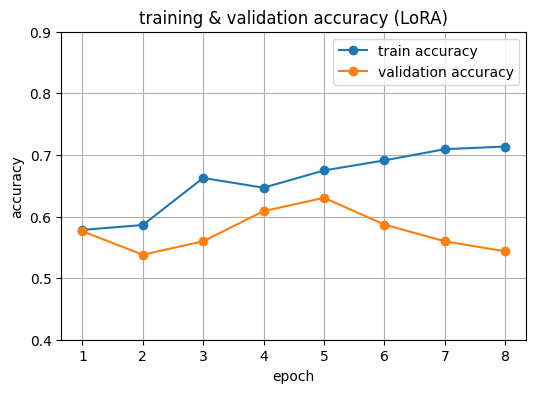

In [49]:
# plot
train_accs = [0.5783, 0.5862, 0.6626, 0.6468, 0.6748, 0.6911, 0.7093, 0.7136]
dev_accs = [0.5761, 0.5380, 0.5598, 0.6087, 0.6304, 0.5870, 0.5598, 0.5435]

plt.figure(figsize=(6,4))
plt.plot(range(1, 9), train_accs, marker="o", label="train accuracy")
plt.plot(range(1, 9), dev_accs, marker="o", label="validation accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("training & validation accuracy (LoRA)")
plt.legend()
plt.grid(True)
plt.ylim(0.4, 0.9)
plt.show()

In [53]:
test_preds, test_labels = eval(model, test_loader, name="test")

test Accuracy: 0.5873


# Question 5

In [ ]:
!!pip install faiss-cpu

['Collecting faiss-cpu',
 '  Downloading faiss_cpu-1.12.0-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (5.1 kB)',
 'Requirement already satisfied: numpy<3.0,>=1.25.0 in /usr/local/lib/python3.12/dist-packages (from faiss-cpu) (2.0.2)',
 'Requirement already satisfied: packaging in /usr/local/lib/python3.12/dist-packages (from faiss-cpu) (25.0)',
 'Downloading faiss_cpu-1.12.0-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl (31.4 MB)',
 '\x1b[?25l   \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b0.0/31.4 MB\x1b \x1b?\x1b eta \x1b-:--:--\x1b',
 '\x1b[2K   \x1b━━━━\x1b\x1b╸\x1b\x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b3.7/31.4 MB\x1b \x1b113.0 MB/s\x1b eta \x1b0:00:01\x1b',
 '\x1b[2K   \x1b━━━━━━━━━━━\x1b\x1b╺\x1b\x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b8.8/31.4 MB\x1b \x1b128.5 MB/s\x1b eta \x1b0:00:01\x1b',
 '\x1b[2K   \x1b━━━━━━━━━━━━━━━━━\x1b\x1b╺\x1b\x1b━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b13.6/31.4 MB\x1b \x1b106.8 MB/s\x1b eta \x1b0:00:01\x

In [ ]:
import numpy as np
import pickle
import faiss

from datasets import load_dataset

In [ ]:
# 1) load claims and evidence data, along with GT labels
input_file = "/scifact_evidence_embeddings.pkl"

# load pickled embeddings
with open(input_file, "rb") as f:
    evidence_embeddings = pickle.load(f)

In [ ]:
input_file = "/scifact_claim_embeddings.pkl"

# load pickled embeddings
with open(input_file, "rb") as f:
    claim_embeddings = pickle.load(f)

print(claim_embeddings.keys())

dict_keys([(0, '0-dimensional biomaterials lack inductive properties.'), (2, '1 in 5 million in UK have abnormal PrP positivity.'), (4, '1-1% of colorectal cancer patients are diagnosed with regional or distant metastases.'), (6, '10% of sudden infant death syndrome (SIDS) deaths happen in newborns aged less than 6 months.'), (9, '32% of liver transplantation programs required patients to discontinue methadone treatment in 2001.'), (10, '4-PBA treatment decreases endoplasmic reticulum stress in response to general endoplasmic reticulum stress markers.'), (11, '4-PBA treatment raises endoplasmic reticulum stress in response to general endoplasmic reticulum stress markers.'), (12, '40mg/day dosage of folic acid and 2mg/day dosage of vitamin B12 does not affect chronic kidney disease (CKD) progression.'), (14, "5'-nucleotidase metabolizes 6MP."), (15, '50% of patients exposed to radiation have activated markers of mesenchymal stem cells.'), (17, '53% of perinatal mortality is due to low b

In [ ]:
# load the claims tables for GT relset
claims = load_dataset(
    "allenai/scifact",
    data_dir="claims",
    revision="refs/convert/parquet",
    split="train",
)

0000.parquet:   0%|          | 0.00/63.0k [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/28.7k [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/22.1k [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [ ]:
# build dict mapping claim doc IDs to their evidences
claim_to_evidence_doc_ids = {}

for claim in claims:
    claim_to_evidence_doc_ids[claim["id"]] = claim["cited_doc_ids"]

print(claim_to_evidence_doc_ids)

{0: [31715818], 2: [13734012], 4: [22942787], 6: [2613775], 9: [44265107], 10: [32587939], 11: [32587939], 12: [33409100], 14: [641786], 15: [22080671], 17: [1606628], 18: [22942787], 19: [3202143], 20: [3202143], 21: [41493639], 22: [6490571], 24: [3471191], 25: [2613775], 26: [32390525], 27: [32390525], 28: [12670680], 30: [24341590], 32: [12428497], 34: [11705328], 35: [5152028, 11705328], 37: [5152028, 11705328], 39: [13497630], 40: [13497630], 41: [18174210], 43: [7224723], 44: [56893404], 45: [56893404], 46: [380526], 47: [3512154, 26996935], 52: [45638119], 55: [49556906], 58: [4709641], 60: [13899137, 13901073], 61: [13899137, 13901073], 62: [32587939], 63: [40349336], 64: [40349336], 66: [14806256], 67: [21295300], 68: [21295300], 69: [5956380, 4414547], 71: [1127562], 73: [6076903], 74: [4387784], 76: [5531479], 77: [5531479], 78: [5099266], 79: [5099266], 80: [4920376], 81: [1797622], 82: [3619372], 85: [7521113, 22406695], 86: [7521113, 22406695], 88: [7521113, 22406695], 8

In [ ]:
# 2) get np.array of evidence embeddings, set up dicts
evidence_vectors = []
evidence_idx_to_doc = {}

for i, (doc, embedding) in enumerate(evidence_embeddings.items()):
    doc_id, abstract = doc

    evidence_vectors.append(embedding)
    evidence_idx_to_doc[i] = doc_id

# turn into numpy array
evidence_vectors = np.array(evidence_vectors).astype("float32")
print(evidence_vectors.shape)

(5183, 1536)


In [ ]:
claim_vectors = []
claim_idx_to_doc = {}
for i, (doc, embedding) in enumerate(claim_embeddings.items()):
    doc_id, abstract = doc

    claim_vectors.append(embedding)
    claim_idx_to_doc[i] = doc_id

# turn into numpy array
claim_vectors = np.array(claim_vectors).astype("float32")
print(claim_vectors.shape)

(809, 1536)


In [ ]:
# 3) normalize vectors
faiss.normalize_L2(evidence_vectors)
faiss.normalize_L2(claim_vectors)

In [ ]:
# 4) define metric functions

def calc_rr(claim_index, sample):
    for rank, evidence_index in enumerate(sample):
        # check if this evidence came from same doc as claim
        if evidence_idx_to_doc[evidence_index] in claim_to_evidence_doc_ids[claim_idx_to_doc[claim_index]]:
            return 1 / (rank + 1)

    return 0

def calc_ap(claim_index, sample):
    precisions = []
    hit_count = 0

    for rank, evidence_index in enumerate(sample):
        if evidence_idx_to_doc[evidence_index] in claim_to_evidence_doc_ids[claim_idx_to_doc[claim_index]]:
            hit_count += 1
            precisions.append(hit_count / (rank + 1))

    return np.mean(precisions) if hit_count > 0 else 0

In [ ]:
# create index
d = evidence_vectors.shape[-1]
index = faiss.IndexFlatL2(d)
index.add(evidence_vectors)

In [ ]:
for k in [1, 10, 50]:
    # conduct search
    D, I = index.search(claim_vectors, k=k)

    # calculate metrics
    rrs = []
    aps = []

    for claim_index, sample in enumerate(I):
        rrs.append(calc_rr(claim_index, sample))
        aps.append(calc_ap(claim_index, sample))

    mrr = np.mean(rrs)
    map = np.mean(aps)

    print(f"MRR@{k}: {mrr}")
    print(f"MAP@{k}: {map}")

MRR@1: 0.5896168108776267
MAP@1: 0.5896168108776267
MRR@10: 0.6816758883198932
MAP@10: 0.6774373614299448
MRR@50: 0.6858945383332596
MAP@50: 0.6785670461646438


In [ ]:
rrs = []
aps = []

for claim_index, sample in enumerate(I):
    rrs.append(calc_rr(claim_index, sample))
    aps.append(calc_ap(claim_index, sample))

mrr = np.mean(rrs)
map = np.mean(aps)

print(f"MRR: {mrr}")
print(f"MAP: {map}")

# put everything in index
# for each evidence, i get the

MRR: 0.6816758883198932
MAP: 0.6774373614299448
